In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from mpl_toolkits.mplot3d import axes3d

from modules.cluster_getter import get_all_clusters, delete_target_column, get_X_Y_Z_from_cluster
from modules.cluster_getter import check_cluster_elements, check_elements_corr_to_centroid
from modules.cluster_graphs import draw_clusters_scatterplot
from modules.centroids import count_centroid

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('prepared_dataset/20_mV_OCO_sequences.csv')
df.head()

,o1,c,o2
0,0.479905,0.000000,0.731678
1,0.731678,0.085809,0.044917
2,0.044917,0.056106,0.014184
3,0.014184,0.039604,0.002364
4,0.002364,0.660066,0.143026


In [4]:
df.corr()

,o1,c,o2
o1,1.000000,-0.076522,0.268183
c,-0.076522,1.000000,-0.070718
o2,0.268183,-0.070718,1.000000


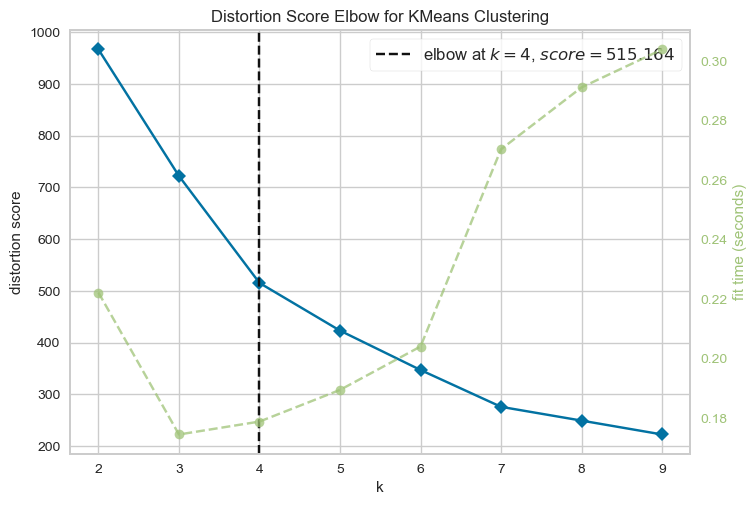

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model = KMeans(init="k-means++", n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df) 
visualizer.show()

In [6]:
k_clusters = 4

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4, n_init=10))

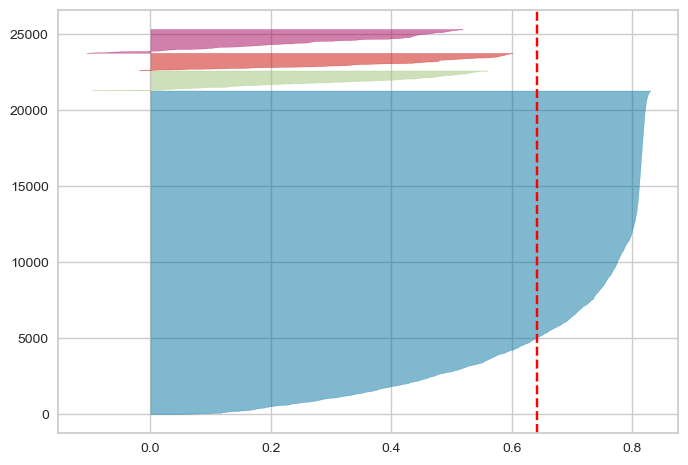

In [7]:
km = KMeans(n_clusters=k_clusters, init="k-means++", n_init=10, max_iter=100)
visualizer = SilhouetteVisualizer(km, colors="yellowbrick")
visualizer.fit(df)

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df)

In [9]:
kmeans.cluster_centers_

array([[0.0430269 , 0.04988829, 0.04400617],
       [0.14341974, 0.02424537, 0.55050618],
       [0.03245875, 0.52209623, 0.05603547],
       [0.49989917, 0.04971086, 0.12744373]])

In [10]:
centroids = kmeans.cluster_centers_
y_means = kmeans_labels

In [11]:
df['Clusters'] = y_means

In [12]:
values = df.values

In [13]:
clusters = get_all_clusters(values, k_clusters)

In [14]:
clusters = delete_target_column(clusters)

In [15]:
clusters

[array([[0.04491726, 0.05610561, 0.0141844 ],
        [0.0141844 , 0.03960396, 0.00236407],
        [0.143026  , 0.17821782, 0.13238771],
        ...,
        [0.00568182, 0.10596026, 0.00568182],
        [0.00568182, 0.26241722, 0.15909091],
        [0.15909091, 0.03559603, 0.26420455]]),
 array([[0.47990544, 0.        , 0.73167849],
        [0.0141844 , 0.05940594, 0.44680851],
        [0.12411348, 0.01320132, 0.53191489],
        ...,
        [0.53977273, 0.02649007, 0.53693182],
        [0.01704545, 0.06456954, 0.34375   ],
        [0.01136364, 0.01241722, 0.92329545]]),
 array([[0.00236407, 0.66006601, 0.143026  ],
        [0.01300236, 0.54455446, 0.02364066],
        [0.01536643, 0.90759076, 0.        ],
        ...,
        [0.00852273, 0.31953642, 0.00568182],
        [0.01420455, 0.32864238, 0.01136364],
        [0.00852273, 0.30049669, 0.01704545]]),
 array([[0.73167849, 0.08580858, 0.04491726],
        [0.44680851, 0.14191419, 0.08274232],
        [0.53191489, 0.05610561, 0.

In [16]:
cluster_0_coors = get_X_Y_Z_from_cluster(clusters[0])
cluster_1_coors = get_X_Y_Z_from_cluster(clusters[1])
cluster_2_coors = get_X_Y_Z_from_cluster(clusters[2])
cluster_3_coors = get_X_Y_Z_from_cluster(clusters[3])

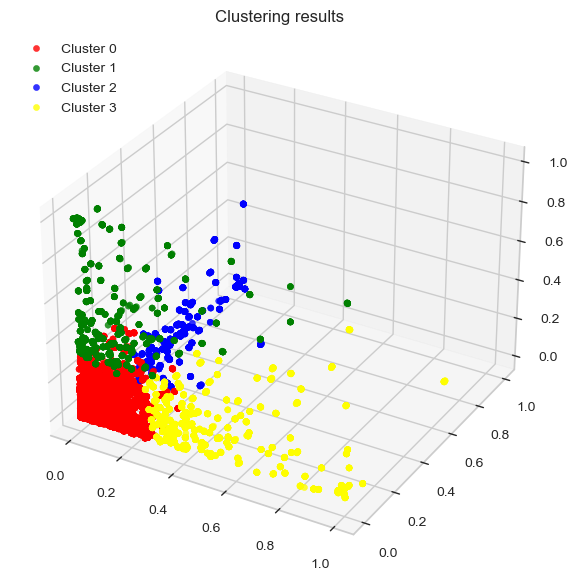

In [17]:
draw_clusters_scatterplot(cluster_0_coors, cluster_1_coors, cluster_2_coors, cluster_3_coors)

In [18]:
elements_to_another_cluster = [ [], [], [], []]

In [19]:
clusters[0], elements_to_another_cluster[0], centroids[0] = check_cluster_elements(clusters[0], centroids[0], 0.95)
clusters[1], elements_to_another_cluster[1], centroids[1] = check_cluster_elements(clusters[1], centroids[1], 0.95)
clusters[2], elements_to_another_cluster[2], centroids[2] = check_cluster_elements(clusters[2], centroids[2], 0.95)
clusters[3], elements_to_another_cluster[3], centroids[3] = check_cluster_elements(clusters[3], centroids[3], 0.95)

In [20]:
invalid_cluster_values = np.concatenate((elements_to_another_cluster[0], elements_to_another_cluster[1], 
                                        elements_to_another_cluster[2], elements_to_another_cluster[3]), 
                                        axis=0)

In [21]:
len(invalid_cluster_values)

16504

In [22]:
clusters, centroids = [], []
non_corr_elements = []

In [23]:
while(len(invalid_cluster_values) > 0):
    cluster = np.copy(invalid_cluster_values)
    cluster_x_val, cluster_y_val, cluster_z_val = get_X_Y_Z_from_cluster(cluster)
    centroid = count_centroid(cluster_x_val, cluster_y_val, cluster_z_val)
    cluster, invalid_cluster_values, centroid = check_cluster_elements(cluster, centroid, 0.95)
    cluster, invalid_cluster_values, centroid = check_elements_corr_to_centroid(cluster, invalid_cluster_values, 
                                                                                centroid, 0.95, non_corr_elements)

    if(len(cluster > 0)):  
        clusters.append(cluster)
        centroids.append(centroid)

KeyboardInterrupt: 